## *How do various demographic indicators, encompassing gender and age distribution among the population, contribute to variations in obesity rates within regions of The Netherlands?*

## PART 1 - Pre-processing the data

### Merging datasets

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the "Key figures for districts and neighborhoods" dataset and the "Health per district and neighborhood" dataset
df1 = pd.read_excel("/content/key_figures_data.xls")
df2 = pd.read_excel("/content/health_data.xls")

In [ ]:
df1[:3]

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
0,NL00,0,Nederland,Nederland,Land,NL00,.,17282163,8581086,8701077,...,"0,6","0,7","10,9",4154338,3367109,787228,.,.,2,1994
1,GM0003,3,Appingedam,Appingedam,Gemeente,GM0003,.,11721,5720,6001,...,"0,9","0,9","6,4",2458,2378,80,.,.,3,1067
2,WK000300,300,Wijk 00,Appingedam,Wijk,WK000300,1,11720,5720,6000,...,"0,9","0,9","6,4",2458,2378,80,.,.,3,1067


In [ ]:
df2[:3]

,Leeftijd,Marges,Perioden,Wijken en buurten,Regioaanduiding/Gemeentenaam (naam),Regioaanduiding/Soort regio (omschrijving),Regioaanduiding/Codering (code),Ervaren gezondheid (goed/zeer goed) (%),Bewegen/Voldoet aan beweegrichtlijn (%),Onder- en overgewicht/Mate van overgewicht/Ernstig overgewicht (%),Roker (%),Alcoholgebruik/Voldoet aan alcohol richtlijn (%),Lichamelijke gezondheid/Eén of meer langdurige aandoeningen (%),Psychische klachten (%),Veerkracht/(Zeer) lage veerkracht (%),Hoog risico op angst of depressie (%),Eenzaamheid/Ernstig/zeer ernstig eenzaam (%)
0,18 jaar of ouder,Waarde,2020,Nederland,Nederland,Land,NL01,78.4,49.9,15.6,18.0,43.8,32.6,.,.,6.8,11.3
1,18 jaar of ouder,Waarde,2020,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,80.3,47.5,15.8,15.2,43.3,33.9,.,.,3.7,8.0
2,18 jaar of ouder,Waarde,2020,Wijk 00 Annen,Aa en Hunze,Wijk,WK168000,81.2,48.2,15.7,14.0,41.4,34.0,.,.,3.5,7.5


We see that in order to add the *Onder- en overgewicht/Mate van overgewicht/Ernstig overgewicht*  column from the health table (in other words *obesity_rate*) to the key figures table, we first need to order both tables such that the values of the columns *Regioaanduiding/Codering (code)* and *gwb_code* match.
That is why we will first sort both tables by region code and after that filter them such that the region code values that are not present in both tables are removed.

In [ ]:
#Renaming the columns to facilitate the process
df2.rename(columns={"Onder- en overgewicht/Mate van overgewicht/Ernstig overgewicht (%)": "obesity_rate"}, inplace=True)
df2.rename(columns={"Regioaanduiding/Codering (code)": "gwb_code"}, inplace=True)

In [ ]:
#Sorting the tables by their region code
sorted_df1 = df1.sort_values(by="gwb_code").reset_index(drop=True)
sorted_df2 = df2.sort_values(by="gwb_code").reset_index(drop=True)

In [ ]:
#Converting the "gwb_code" column to strings and removing any leading or trailing whitespaces.
sorted_df1["gwb_code"] = sorted_df1["gwb_code"].astype(str).str.strip()
sorted_df2["gwb_code"] = sorted_df2["gwb_code"].astype(str).str.strip()

#Filtering the rows in each table to keep only the rows with common "gwb_code" values
common_gwb_codes = set(sorted_df1["gwb_code"]).intersection(sorted_df2["gwb_code"])
df1_filtered = sorted_df1[sorted_df1["gwb_code"].isin(common_gwb_codes)]
df2_filtered = sorted_df2[sorted_df2["gwb_code"].isin(common_gwb_codes)]

In [ ]:
df1_filtered["gwb_code"]

54       BU00140000
55       BU00140001
56       BU00140002
57       BU00140003
58       BU00140004
            ...    
17109      WK197816
17110      WK197817
17111      WK197818
17112      WK197819
17113      WK197820
Name: gwb_code, Length: 15938, dtype: object

In [ ]:
df2_filtered["gwb_code"]

0        BU00140000
1        BU00140001
2        BU00140002
3        BU00140003
4        BU00140004
            ...    
17915      WK197816
17916      WK197817
17917      WK197818
17918      WK197819
17919      WK197820
Name: gwb_code, Length: 15938, dtype: object

Both tables now have the same number of rows and have matching *region* and *region_code*, so it was properly filtered. Lets continue by adding the *obesity_rate* column into the key figures table.

In [ ]:
#Merging the columns from both datasets with common "gwb_code" values such that the "obesity_rate" column is added to the key figures dataset
df = pd.merge(df1_filtered, df2_filtered[["gwb_code", "obesity_rate"]], on="gwb_code", how="inner")

Once our data is merged, we will change the index to *regio* in order to establish a reference for the various attributes associated with each region in The Netherlands.

In [ ]:
#Setting "regio" column as the index
df.set_index("regio", inplace=True)

In [ ]:
df[:]

,gwb_code_10,gwb_code_8,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,...,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,obesity_rate
regio,,,,,,,,,,,,,,,,,,,,,
Binnenstad-Noord,BU00140000,140000,Groningen,Buurt,BU00140000,1,4400,2355,2045,70,...,"0,4","15,7",39,37,2,9712,1,1,6378,5.9
Binnenstad-Zuid,BU00140001,140001,Groningen,Buurt,BU00140001,1,6565,3490,3075,150,...,"0,7","17,8",59,55,4,9711,1,1,6087,6.1
Binnenstad-Oost,BU00140002,140002,Groningen,Buurt,BU00140002,1,3965,2075,1885,105,...,"0,7","15,8",29,27,2,9711,3,1,5891,6.9
Binnenstad-West,BU00140003,140003,Groningen,Buurt,BU00140003,1,1730,935,790,35,...,"0,9","16,9",11,10,1,9718,1,1,6024,6.3
Noorderplantsoen,BU00140004,140004,Groningen,Buurt,BU00140004,1,10,5,5,0,...,"0,4","17,0",20,17,3,9717,2,1,5989,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wijk16-Oud-Alblas,WK197816,197816,Molenlanden,Wijk,WK197816,3,2230,1120,1115,430,...,"0,6","1,9",1314,1285,30,.,.,5,232,14.3
Wijk17-Schelluinen,WK197817,197817,Molenlanden,Wijk,WK197817,3,1290,650,645,225,...,"2,7","0,9",358,351,7,.,.,5,166,15.7
Wijk18-Streefkerk,WK197818,197818,Molenlanden,Wijk,WK197818,3,2460,1250,1215,420,...,"0,8","2,0",1670,1522,148,.,.,5,241,15.2


Finally, the new dataset shows the key figures by district and neighborhood within regions of The Netherlands, including obesity rates. It is time to continue by cleaning the data.

### Handling missing values

In [ ]:
#Replacing the commas for dots to facilitate further analysis
df.replace(",", ".", regex=True, inplace=True)

In [ ]:
#Removing spaces or other non-numeric characters from the nummerical data
df.iloc[:, :] = df.iloc[:, :].apply(pd.to_numeric, errors="coerce")

<ipython-input-30-1683258399df>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, :] = df.iloc[:, :].apply(pd.to_numeric, errors="coerce")


In [ ]:
#Analysing the percentage of missing values in each column of the dataset
missing_values_count = df.isnull().sum()
row, column = df.shape
percentage_miss = (missing_values_count/row)*100

#Filtering columns with more than 20% missing values
threshold = 20
columns_above_threshold = percentage_miss[percentage_miss > threshold]

#Printing column names with more than 20% missing values
print("Columns with more than 20% missing values:")
for column_name, percentage in columns_above_threshold.items():
    print(f"{column_name}: {percentage:.2f}%")

Columns with more than 20% missing values:
gwb_code_10: 100.00%
gm_naam: 100.00%
recs: 100.00%
gwb_code: 100.00%
g_woz: 20.15%
g_ele_ap: 42.36%
g_ele_tw: 33.90%
g_ele_hw: 35.58%
g_ele_2w: 31.03%
g_ele_vw: 21.88%
g_ele_hu: 21.81%
g_gas_ap: 43.71%
g_gas_tw: 35.31%
g_gas_hw: 36.90%
g_gas_2w: 32.00%
g_gas_vw: 22.68%
g_gas_hu: 23.37%
p_stadsv: 94.10%
a_inkont: 100.00%
g_ink_po: 100.00%
g_ink_pi: 100.00%
p_ink_li: 100.00%
p_ink_hi: 100.00%
p_n_act: 100.00%
p_hh_li: 100.00%
p_hh_hi: 100.00%
p_hh_lkk: 100.00%
p_hh_osm: 100.00%
g_wodief: 100.00%
g_vernoo: 100.00%
g_gewsek: 100.00%
pst_mvp: 21.22%
pst_dekp: 21.22%


We will remove all the columns with more than 20% missing values as we consider they do not provide sufficient data for analysis. However, we will keep the rest of the columns and, later on, handle properly their missing values. In addition, we will remove the columns that contain non-nummerical data: *gwb_code_10*, *gm_naam*, *recs* and *gwb_code* because we will not be able to use it when building a regressor. We will also remove *gwb_code_8* because we already have the region as the index, and *ind_wbi* due to the fact that it does not display relevant information.

In [ ]:
#Removing unnecessary columns
df = df.drop(columns=["gwb_code_10","gwb_code_8", "gm_naam", "recs", "gwb_code", "ind_wbi", "g_woz", "g_ele_ap", "g_ele_tw", "g_ele_hw", "g_ele_2w",
                     "g_ele_vw", "g_ele_hu", "g_ele_ko", "g_gas_ap", "g_gas_tw", "g_gas_hw", "g_gas_2w", "g_gas_vw", "g_gas_hu", "p_stadsv",
                      "a_inkont", "g_ink_po", "g_ink_pi", "p_ink_li", "p_ink_hi", "p_n_act", "p_hh_li", "p_hh_hi", "p_hh_lkk", "p_hh_osm",
                      "g_wodief", "g_vernoo", "g_gewsek", "g_vernoo", "g_gewsek", "pst_mvp", "pst_dekp"])

Now we will check the properties of the data to decide what to do with the missing values of the rest of the columns.

In [ ]:
df.describe()

,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,...,g_afs_gs,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,ste_mvs,ste_oad,obesity_rate
count,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,...,15359.00000,15359.000000,15359.000000,15359.000000,15938.000000,15938.000000,15938.000000,15887.000000,15885.000000,15301.000000
mean,3111.930481,1544.468503,1566.801920,492.802171,384.885619,769.424332,870.382168,595.115385,1512.839629,1202.377149,...,1.52215,1.084960,1.111824,7.411355,658.037458,593.213578,64.819990,3.578901,1209.594271,14.839841
std,13351.820915,6613.873596,6739.206473,2113.670197,1764.462119,4058.331089,3458.086753,2141.447555,7564.919413,4303.064017,...,1.32001,0.949189,0.888437,7.760624,2662.154512,2029.813533,1081.990365,1.485946,1515.710425,3.478630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.300000
25%,240.000000,125.000000,115.000000,30.000000,30.000000,45.000000,75.000000,45.000000,105.000000,105.000000,...,0.60000,0.400000,0.500000,2.000000,32.000000,31.000000,0.000000,2.000000,168.000000,12.500000
50%,960.000000,475.000000,480.000000,140.000000,110.000000,210.000000,275.000000,175.000000,430.000000,380.000000,...,1.00000,0.700000,0.800000,5.000000,91.000000,87.000000,1.000000,4.000000,729.000000,14.600000
75%,2435.000000,1210.000000,1220.000000,385.000000,295.000000,595.000000,685.000000,470.000000,1180.000000,950.000000,...,2.10000,1.500000,1.500000,10.300000,463.000000,436.000000,9.000000,5.000000,1722.000000,17.000000
max,862965.000000,427787.000000,435178.000000,125602.000000,108487.000000,311068.000000,209828.000000,107980.000000,555066.000000,210221.000000,...,11.70000,10.200000,10.200000,60.800000,90787.000000,52301.000000,58873.000000,5.000000,12417.000000,32.800000


We see that for every column (except the target variable column) the mean is a lot higher than the median, showing that the data inside our feature columns is skewed. Therefore, we will replace these missing values with the median of their respective column because this metric is less sensitive to extreme values.

In [ ]:
#Replacing the missing values by the median
df.replace(r"^\.$", np.nan, regex=True, inplace=True)
df.fillna(df.median(), inplace=True)

In [ ]:
#Calculating the total missing values
total_missing_values = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing_values)

Total missing values in the dataset: 0


### Checking datatypes

We will continue by checking if the column values are in the correct datatypes.

In [ ]:
df.dtypes

a_inw             int64
a_man             int64
a_vrouw           int64
a_00_14           int64
a_15_24           int64
                 ...   
a_lan_ha          int64
a_wat_ha          int64
ste_mvs         float64
ste_oad         float64
obesity_rate    float64
Length: 73, dtype: object

Some columns are of integer type when all of them should be nummerical values with float type. Lets turn the datatypes into the correct form.

In [ ]:
#Changing all datatypes from integer to float
df.iloc[:, :] = df.iloc[:, :].astype(float)

<ipython-input-37-eb74b86f5930>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, :] = df.iloc[:, :].astype(float)


In [ ]:
df.dtypes

a_inw           float64
a_man           float64
a_vrouw         float64
a_00_14         float64
a_15_24         float64
                 ...   
a_lan_ha        float64
a_wat_ha        float64
ste_mvs         float64
ste_oad         float64
obesity_rate    float64
Length: 73, dtype: object

### Handling outliers

In [ ]:
#Loading the values for the features X and for the target variable y
from sklearn.model_selection import train_test_split
X = df.drop("obesity_rate", axis=1).values
y = df["obesity_rate"]

#Splitting the data into train and test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, random_state=42)

In [ ]:
df.describe()

,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,...,g_afs_gs,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,ste_mvs,ste_oad,obesity_rate
count,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,...,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000
mean,3111.930481,1544.468503,1566.801920,492.802171,384.885619,769.424332,870.382168,595.115385,1512.839629,1202.377149,...,1.503181,1.070975,1.100496,7.323755,658.037458,593.213578,64.819990,3.580248,1207.996110,14.830255
std,13351.820915,6613.873596,6739.206473,2113.670197,1764.462119,4058.331089,3458.086753,2141.447555,7564.919413,4303.064017,...,1.299487,0.934567,0.874099,7.631695,2662.154512,2029.813533,1081.990365,1.483757,1513.440949,3.408725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.300000
25%,240.000000,125.000000,115.000000,30.000000,30.000000,45.000000,75.000000,45.000000,105.000000,105.000000,...,0.600000,0.500000,0.500000,2.000000,32.000000,31.000000,0.000000,2.000000,168.250000,12.600000
50%,960.000000,475.000000,480.000000,140.000000,110.000000,210.000000,275.000000,175.000000,430.000000,380.000000,...,1.000000,0.700000,0.800000,5.000000,91.000000,87.000000,1.000000,4.000000,729.000000,14.600000
75%,2435.000000,1210.000000,1220.000000,385.000000,295.000000,595.000000,685.000000,470.000000,1180.000000,950.000000,...,2.000000,1.400000,1.400000,10.000000,463.000000,436.000000,9.000000,5.000000,1718.000000,16.900000
max,862965.000000,427787.000000,435178.000000,125602.000000,108487.000000,311068.000000,209828.000000,107980.000000,555066.000000,210221.000000,...,11.700000,10.200000,10.200000,60.800000,90787.000000,52301.000000,58873.000000,5.000000,12417.000000,32.800000


The data inside the feature columns is still skewed, which suggests that there might be extreme points in our data. Our objective will be to remove the outliers from the dataset without missing important aspects of the data.

In [ ]:
from scipy import stats

#Calculating the Z-score to measure how many standard deviations each data point in the train data is from the mean
z_scores_train = stats.zscore(X_train_new)
abs_z_scores_train = abs(z_scores_train)

#Setting a threshold and filtering out the rows where the Z-scores exceed this threshold for train data
filtered_entries_train = (abs_z_scores_train < 5).all(axis=1)
X_train = X_train_new[filtered_entries_train]
y_train = y_train_new[filtered_entries_train]

#Calculating the Z-score to measure how many standard deviations each data point in the test data is from the mean
z_scores_test = stats.zscore(X_test_new)
abs_z_scores_test = abs(z_scores_test)

#Setting a threshold and filtering out the rows where the Z-scores exceed this threshold for test data
filtered_entries_test = (abs_z_scores_test < 5).all(axis=1)
X_test = X_test_new[filtered_entries_test]
y_test = y_test_new[filtered_entries_test]

In [ ]:
#Printing shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Total shape:", X_train.shape[0] + X_test.shape[0], X_train.shape[1] + X_test.shape[1])

X_train shape: (11260, 72)
X_test shape: (3760, 72)
Total shape: 15020 144


We chose a threshold of 5 so that only measurement, processing or other types of errors represented with this data points are removed. We still keep 15020 rows out of the initial 15983 rows. Removing this many rows will not contribute to missing important data (it is only 6% of the whole dataset) and outliers inside the dataset will be removed for better model performance.

### Inspecting the data distribution of the features

In [ ]:
df.describe()

,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,...,g_afs_gs,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,ste_mvs,ste_oad,obesity_rate
count,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,...,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000,15938.000000
mean,3111.930481,1544.468503,1566.801920,492.802171,384.885619,769.424332,870.382168,595.115385,1512.839629,1202.377149,...,1.503181,1.070975,1.100496,7.323755,658.037458,593.213578,64.819990,3.580248,1207.996110,14.830255
std,13351.820915,6613.873596,6739.206473,2113.670197,1764.462119,4058.331089,3458.086753,2141.447555,7564.919413,4303.064017,...,1.299487,0.934567,0.874099,7.631695,2662.154512,2029.813533,1081.990365,1.483757,1513.440949,3.408725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.300000
25%,240.000000,125.000000,115.000000,30.000000,30.000000,45.000000,75.000000,45.000000,105.000000,105.000000,...,0.600000,0.500000,0.500000,2.000000,32.000000,31.000000,0.000000,2.000000,168.250000,12.600000
50%,960.000000,475.000000,480.000000,140.000000,110.000000,210.000000,275.000000,175.000000,430.000000,380.000000,...,1.000000,0.700000,0.800000,5.000000,91.000000,87.000000,1.000000,4.000000,729.000000,14.600000
75%,2435.000000,1210.000000,1220.000000,385.000000,295.000000,595.000000,685.000000,470.000000,1180.000000,950.000000,...,2.000000,1.400000,1.400000,10.000000,463.000000,436.000000,9.000000,5.000000,1718.000000,16.900000
max,862965.000000,427787.000000,435178.000000,125602.000000,108487.000000,311068.000000,209828.000000,107980.000000,555066.000000,210221.000000,...,11.700000,10.200000,10.200000,60.800000,90787.000000,52301.000000,58873.000000,5.000000,12417.000000,32.800000


The feature columns still have skewed data as the mean is a lot higher than the median. Lets create a box plot of the first features to visualize it so it is more clear.

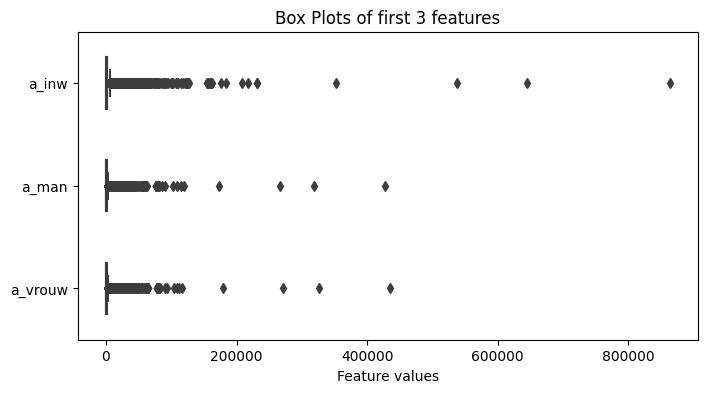

In [ ]:
#Retrieving and plotting boxplots of the first three features
first_3_features = ["a_inw", "a_man", "a_vrouw"]

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[first_3_features], orient="h", width=0.5)
plt.title("Box Plots of first 3 features")
plt.xlabel("Feature values")
plt.show()

From the plot it is easier to see that the data is skewed. Dealing with this kind of data will be challenging throughout the experimental evaluation part.

### Examining correlations between features

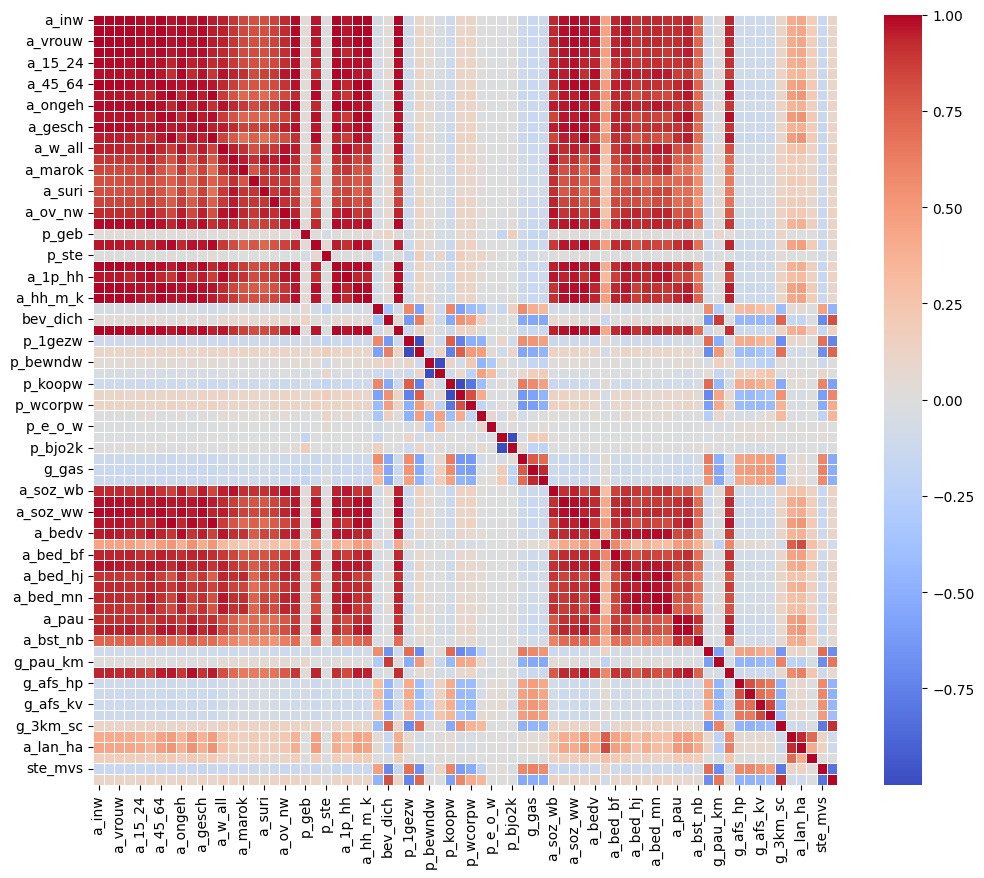

In [ ]:
#Plotting a correlation matrix between features
correlation_matrix = df.drop(columns=["obesity_rate"]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.show()

We can see certain linear relations between features that may indicate wether they are relevant for analysis or not. However, for the moment we will not do feature selection. We will wait to fit the different models and then, if they require of this procedure, analyse which features contribute most and are more important for the model.

## PART 2 - Finding the top-performing regression model

In [ ]:
#Importing the necessary libraries

#Scaling
from sklearn.preprocessing import StandardScaler

#Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

### Ordinary Least Squares (OLS) regression model

In [ ]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled_ols = scaler.fit_transform(X_train)
X_test_scaled_ols = scaler.transform(X_test)

#Fitting the model to the training data
model_ols = LinearRegression()
model_ols.fit(X_train_scaled_ols, y_train)

LinearRegression()

In [ ]:
#Calculating the Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_ols = model_ols.predict(X_test_scaled_ols)

test_mse_ols = mean_squared_error(y_test, y_pred_test_ols)
test_mae_ols = mean_absolute_error(y_test, y_pred_test_ols)
test_r2_ols = r2_score(y_test, y_pred_test_ols)
print(f"Test MSE: {test_mse_ols:.4f}")
print(f"Test MAE: {test_mae_ols:.4f}")
print(f"Test R^2: {test_r2_ols:.4f}")

y_pred_train_ols = model_ols.predict(X_train_scaled_ols)

train_mse_ols = mean_squared_error(y_train, y_pred_train_ols)
train_mae_ols = mean_absolute_error(y_train, y_pred_train_ols)
train_r2_ols = r2_score(y_train, y_pred_train_ols)
print(f"\nTrain MSE: {train_mse_ols:.4f}")
print(f"Train MAE: {train_mae_ols:.4f}")
print(f"Train R^2: {train_r2_ols:.4f}")

Test MSE: 4.7554
Test MAE: 1.6169
Test R^2: 0.5666

Train MSE: 4.6687
Train MAE: 1.5847
Train R^2: 0.5831


The metrics report really low and similar values of test and train R^2 scores. This means that the model, due to its simplicity, is underfitting. Also the MSE and MAE scores of both train and test data are high, showing that the model is not able to perform accurately fitting the data.

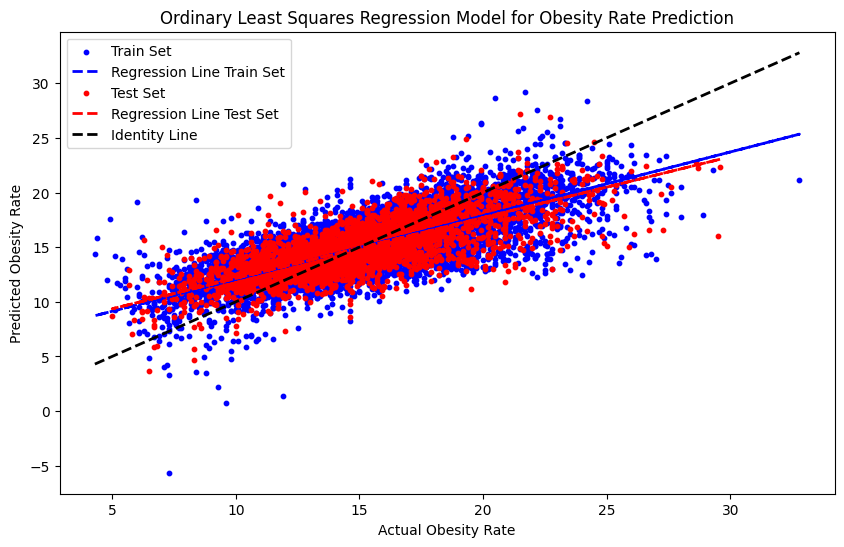

In [ ]:
#Plotting the actual vs predicted obesity rates
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train_ols, color="blue", label="Train Set", s=10)
regression_line_train = np.polyfit(y_train, y_pred_train_ols, 1)
plt.plot(y_train, np.polyval(regression_line_train, y_train), color="blue", linestyle="--", linewidth=2, label="Regression Line Train Set")

plt.scatter(y_test, y_pred_test_ols, color="red", label="Test Set", s=10)
regression_line_test = np.polyfit(y_test, y_pred_test_ols, 1)
plt.plot(y_test, np.polyval(regression_line_test, y_test), color="red", linestyle="--", linewidth=2, label="Regression Line Test Set")

plt.plot([min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         linestyle="--", color="black", linewidth=2, label="Identity Line")

plt.title("Ordinary Least Squares Regression Model for Obesity Rate Prediction")
plt.xlabel("Actual Obesity Rate")
plt.ylabel("Predicted Obesity Rate")
plt.legend()
plt.show()

From the plot we see that the model is clearly underfitting. Basic linear regression is definitely not suitable for our data.

We will continue by using a more complex model applying L2 regularization to see if we improve the performance.

### Ridge regression model (L2 regularization)

In [ ]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled_ridge = scaler.fit_transform(X_train)
X_test_scaled_ridge = scaler.transform(X_test)

#Fitting the Ridge regression model to the training data
model_ridge = Ridge(alpha=0.001)
model_ridge.fit(X_train_scaled_ridge, y_train)

Ridge(alpha=0.001)

In [ ]:
#Calculating the Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_ridge = model_ridge.predict(X_test_scaled_ridge)

test_mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)
print(f"Test MSE: {test_mse_ridge:.4f}")
print(f"Test MAE: {test_mae_ridge:.4f}")
print(f"Test R^2: {test_r2_ridge:.4f}")

y_pred_train_ridge = model_ridge.predict(X_train_scaled_ridge)

train_mse_ridge = mean_squared_error(y_train, y_pred_train_ridge)
train_mae_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)
print(f"\nTrain MSE: {train_mse_ridge:.4f}")
print(f"Train MAE: {train_mae_ridge:.4f}")
print(f"Train R^2: {train_r2_ridge:.4f}")

Test MSE: 4.7553
Test MAE: 1.6165
Test R^2: 0.5666

Train MSE: 4.6701
Train MAE: 1.5849
Train R^2: 0.5829


In [ ]:
#Optimizing the model hyperparameters using grid search
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 0.1]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=10, return_train_score=True)
grid_ridge.fit(X_train_scaled_ridge, y_train)

print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

0.5737314289617632
{'alpha': 0.001}


A train R^2 score of 0.58 and test R^2 score of 0.56 shows that the model is, again, underfitting. Also the MSE and MAE scores of both test and train data are high, showing that the model is not able to perform accurately fitting the data.

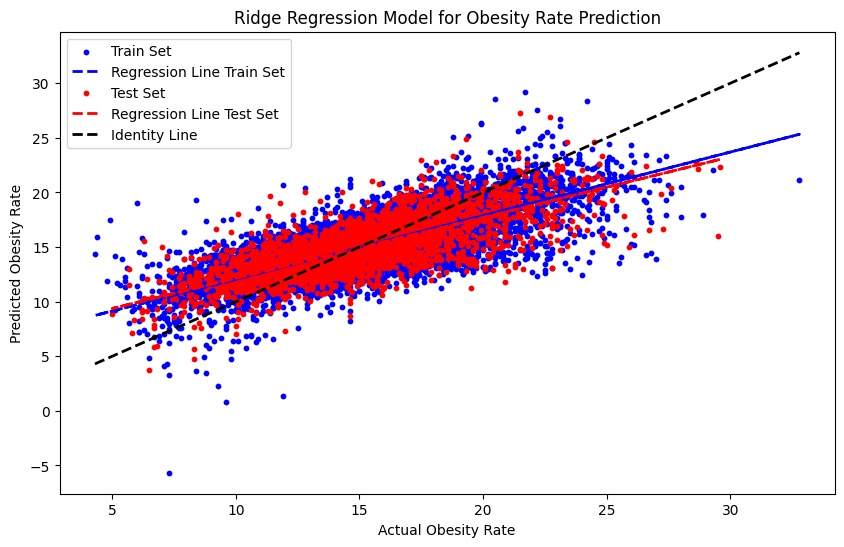

In [ ]:
#Plotting the actual vs predicted obesity rates
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train_ridge, color="blue", label="Train Set", s=10)
regression_line_train = np.polyfit(y_train, y_pred_train_ridge, 1)
plt.plot(y_train, np.polyval(regression_line_train, y_train), color="blue", linestyle="--", linewidth=2, label="Regression Line Train Set")

plt.scatter(y_test, y_pred_test_ridge, color="red", label="Test Set", s=10)
regression_line_test = np.polyfit(y_test, y_pred_test_ridge, 1)
plt.plot(y_test, np.polyval(regression_line_test, y_test), color="red", linestyle="--", linewidth=2, label="Regression Line Test Set")

plt.plot([min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         linestyle="--", color="black", linewidth=2, label="Identity Line")

plt.title("Ridge Regression Model for Obesity Rate Prediction")
plt.xlabel("Actual Obesity Rate")
plt.ylabel("Predicted Obesity Rate")
plt.legend()
plt.show()

The plot is identical to OLS, showing it is clearly underfitting. The L2 regularization parameter does not seem to improve the model performance at all, possibly due to its simplicity.

Lets apply L1 regularization with Lasso regression model to see if this parameter helps improve model performance.

### Lasso regression model (L1 regularization)

In [ ]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled_lasso = scaler.fit_transform(X_train)
X_test_scaled_lasso = scaler.transform(X_test)

#Fitting the Lasso regression model to the training data
model_lasso = Lasso(alpha=0.001, max_iter=30000)
model_lasso.fit(X_train_scaled_lasso, y_train)

Lasso(alpha=0.001, max_iter=30000)

In [ ]:
#Calculating the Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_lasso = model_lasso.predict(X_test_scaled_lasso)

test_mse_lasso = mean_squared_error(y_test, y_pred_test_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
test_r2_lasso = r2_score(y_test, y_pred_test_lasso)
print(f"Test MSE: {test_mse_lasso:.4f}")
print(f"Test MAE: {test_mae_lasso:.4f}")
print(f"Test R^2: {test_r2_lasso:.4f}")

y_pred_train_lasso = model_lasso.predict(X_train_scaled_lasso)

train_mse_lasso = mean_squared_error(y_train, y_pred_train_lasso)
train_mae_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
train_r2_lasso = r2_score(y_train, y_pred_train_lasso)
print(f"\nTrain MSE: {train_mse_lasso:.4f}")
print(f"Train MAE: {train_mae_lasso:.4f}")
print(f"Train R^2: {train_r2_lasso:.4f}")

Test MSE: 4.9898
Test MAE: 1.6622
Test R^2: 0.5452

Train MSE: 4.9454
Train MAE: 1.6316
Train R^2: 0.5584


In [ ]:
#Optimizing the model hyperparameters using grid search
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0]}
grid_lasso = GridSearchCV(Lasso(max_iter=50000), param_grid_lasso, cv=10,  return_train_score=True)
grid_lasso.fit(X_train_scaled_lasso, y_train)

print(grid_lasso.best_score_)
print(grid_lasso.best_params_)

0.5502514324512001
{'alpha': 0.001}


A train R^2 score of 0.55 and test R^2 score of 0.54 shows that the model is again underfitting. Also the MSE and MAE scores of both train and test data are high, showing that the model is not able to perform accurately fitting the data.

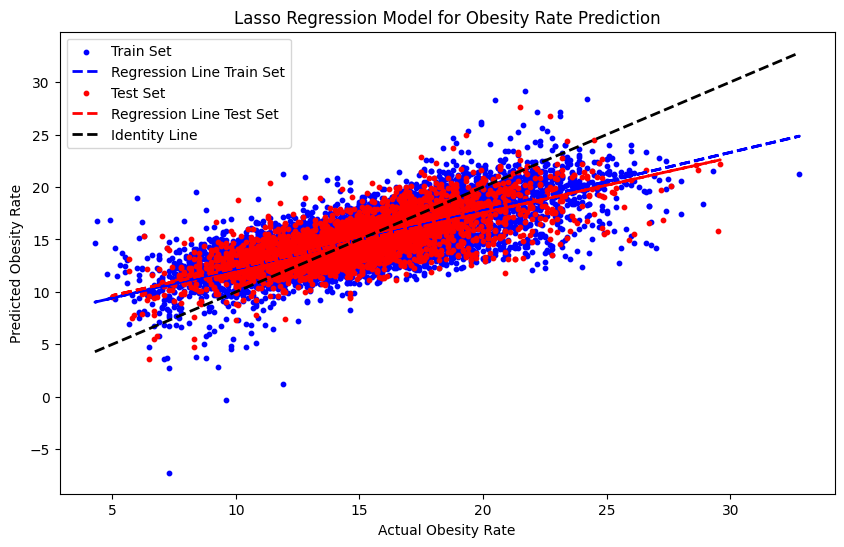

In [ ]:
#Plotting the actual vs predicted obesity rates
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train_lasso, color="blue", label="Train Set", s=10)
regression_line_train = np.polyfit(y_train, y_pred_train_lasso, 1)
plt.plot(y_train, np.polyval(regression_line_train, y_train), color="blue", linestyle="--", linewidth=2, label="Regression Line Train Set")

plt.scatter(y_test, y_pred_test_lasso, color="red", label="Test Set", s=10)
regression_line_test = np.polyfit(y_test, y_pred_test_lasso, 1)
plt.plot(y_test, np.polyval(regression_line_test, y_test), color="red", linestyle="--", linewidth=2, label="Regression Line Test Set")

plt.plot([min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         linestyle="--", color="black", linewidth=2, label="Identity Line")

plt.title("Lasso Regression Model for Obesity Rate Prediction")
plt.xlabel("Actual Obesity Rate")
plt.ylabel("Predicted Obesity Rate")
plt.legend()
plt.show()

Again, from the plot we see that the model is underfitting. The L1 regularization parameter is not improving model performance, probably also due to its simplicity. Moreover, knowing that L1 and L2 regularization parameters do not really help improve the model performance helps us realize that ElasticNet will also not be a better fit for the data, due to the fact that it uses both L1 and L2 regularization.

We will continue by trying to fit the data to a different regression model: a Decision Tree.

### Decision Tree regression model

In [ ]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled_tree = scaler.fit_transform(X_train)
X_test_scaled_tree = scaler.transform(X_test)

#Fitting the Decision Tree regression model to the training data
model_tree = DecisionTreeRegressor(**{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10})
model_tree.fit(X_train_scaled_tree, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [ ]:
#Calculating the Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_tree = model_tree.predict(X_test_scaled_tree)

test_mse_tree = mean_squared_error(y_test, y_pred_test_tree)
test_mae_tree = mean_absolute_error(y_test, y_pred_test_tree)
test_r2_tree = r2_score(y_test, y_pred_test_tree)
print(f"Test MSE: {test_mse_tree:.4f}")
print(f"Test MAE: {test_mae_tree:.4f}")
print(f"Test R^2: {test_r2_tree:.4f}")

y_pred_train_tree = model_tree.predict(X_train_scaled_tree)

train_mse_tree = mean_squared_error(y_train, y_pred_train_tree)
train_mae_tree = mean_absolute_error(y_train, y_pred_train_tree)
train_r2_tree = r2_score(y_train, y_pred_train_tree)
print(f"\nTrain MSE: {train_mse_tree:.4f}")
print(f"Train MAE: {train_mae_tree:.4f}")
print(f"Train R^2: {train_r2_tree:.4f}")

Test MSE: 5.5164
Test MAE: 1.7495
Test R^2: 0.4972

Train MSE: 3.3036
Train MAE: 1.3388
Train R^2: 0.7050


In [ ]:
#Optimizing the model hyperparameters using grid search
param_grid_tree = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree, cv=10,  return_train_score=True)
grid_tree.fit(X_train_scaled_tree, y_train)

print(grid_tree.best_score_)
print(grid_tree.best_params_)

0.48612164555345033
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


A train R^2 score of 0.70 and test R^2 score of 0.49 shows that the model could be overfitting. Also, a high test MSE score shows that the model is not doing accurate predictions. We will implement feature selection with SelectKBest algorithm to try improving the performance of the model.

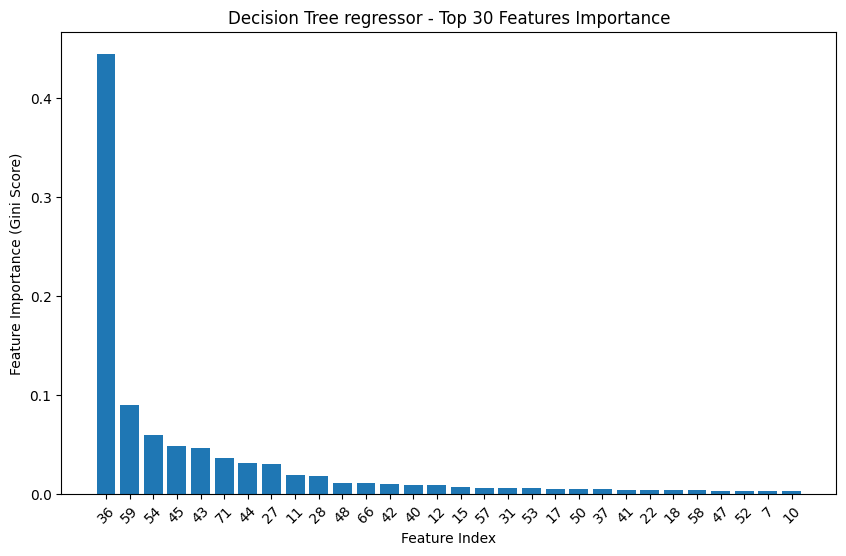

Features with Gini score higher than 0.025: [36 59 54 45 43 71 44 27]
Total number of features: 8


In [ ]:
#Finding the most important features
important_features_tree = model_tree.feature_importances_

#Plotting the top 30 most important features from Decision Tree regressor
indices = np.argsort(important_features_tree)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(30), important_features_tree[indices[:30]])
plt.xticks(range(30), indices[:30], rotation=45)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance (Gini Score)")
plt.title(f"Decision Tree regressor - Top 30 Features Importance")
plt.show()

#Selecting and printing the most important features
selected_indices = np.where(important_features_tree > 0.025)[0]
sorted_indices = np.argsort(important_features_tree[selected_indices])[::-1]
final_selected_indices = selected_indices[sorted_indices]
print("Features with Gini score higher than 0.025:", final_selected_indices)
print("Total number of important features:", len(final_selected_indices))

From the plot, we decide that we will use only the top 8 features as they have a Gini score higher than 0.025. Therefore, we will fit the model with ony those top 8 features in order to reduce overfitting, and afterwards see how accurate the model is.

In [ ]:
#Retrieving the top 10 most important features and adding them into a new X_train and X_test variable
important_features = np.argsort(important_features_tree)[::-1][:8]
important_features = important_features.astype(int)
X_train_fi_tree = X_train_scaled_tree[:, important_features]
X_test_fi_tree = X_test_scaled_tree[:, important_features]

In [ ]:
#Optimizing the new model hyperparameters using grid search
param_grid_tree = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree, cv=10,  return_train_score=True)
grid_tree.fit(X_train_fi_tree, y_train)

print(grid_tree.best_score_)
print(grid_tree.best_params_)

0.5162635432806857
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
#Fitting the new Decision Tree regression model to the training data
model_fi_tree = DecisionTreeRegressor(**{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10})
model_fi_tree.fit(X_train_fi_tree, y_train)

#Calculating the new Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_fi_tree = model_fi_tree.predict(X_test_fi_tree)

test_mse_tree = mean_squared_error(y_test, y_pred_test_fi_tree)
test_mae_tree = mean_absolute_error(y_test, y_pred_test_fi_tree)
test_r2_tree = r2_score(y_test, y_pred_test_fi_tree)
print(f"Test MSE: {test_mse_tree:.4f}")
print(f"Test MAE: {test_mae_tree:.4f}")
print(f"Test R^2: {test_r2_tree:.4f}")

y_pred_train_fi_tree = model_fi_tree.predict(X_train_fi_tree)

train_mse_tree = mean_squared_error(y_train, y_pred_train_fi_tree)
train_mae_tree = mean_absolute_error(y_train, y_pred_train_fi_tree)
train_r2_tree = r2_score(y_train, y_pred_train_fi_tree)
print(f"\nTrain MSE: {train_mse_tree:.4f}")
print(f"Train MAE: {train_mae_tree:.4f}")
print(f"Train R^2: {train_r2_tree:.4f}")

Test MSE: 5.0840
Test MAE: 1.6823
Test R^2: 0.5366

Train MSE: 3.6551
Train MAE: 1.4072
Train R^2: 0.6736


With feature selection we reduced overfitting by lowering the gap between train and test R^2 scores. However, the gap is still big showing there is still overfitting. Also, there are still high test MSE and MAE scores, showing that the model is not accurately doing predictions. Still, we will keep these new scores for plotting, as they reveal a model that is less overfitted to the data.

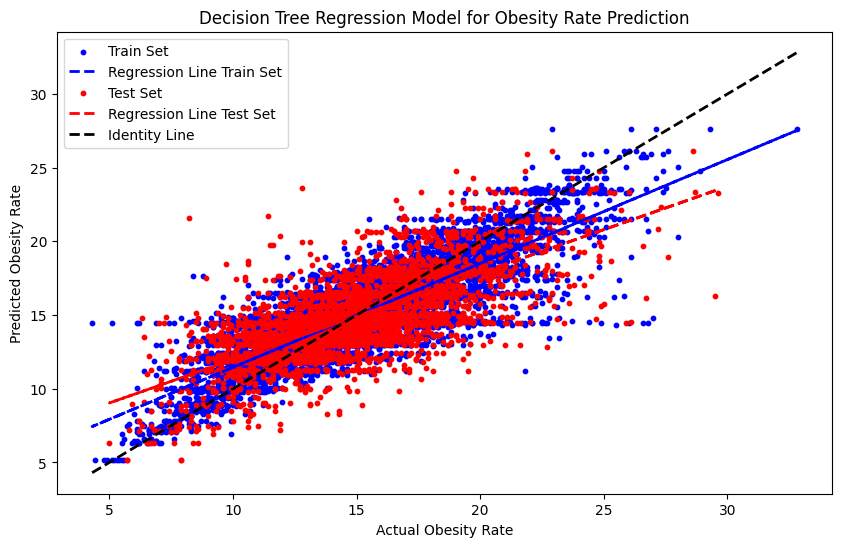

In [ ]:
#Plotting the actual vs predicted obesity rates
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train_fi_tree, color="blue", label="Train Set", s=10)
regression_line_train = np.polyfit(y_train, y_pred_train_fi_tree, 1)
plt.plot(y_train, np.polyval(regression_line_train, y_train), color="blue", linestyle="--", linewidth=2, label="Regression Line Train Set")

plt.scatter(y_test, y_pred_test_fi_tree, color="red", label="Test Set", s=10)
regression_line_test = np.polyfit(y_test, y_pred_test_fi_tree, 1)
plt.plot(y_test, np.polyval(regression_line_test, y_test), color="red", linestyle="--", linewidth=2, label="Regression Line Test Set")

plt.plot([min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         linestyle="--", color="black", linewidth=2, label="Identity Line")

plt.title("Decision Tree Regression Model for Obesity Rate Prediction")
plt.xlabel("Actual Obesity Rate")
plt.ylabel("Predicted Obesity Rate")
plt.legend()
plt.show()

From the plot we can also see how the model manages to explain almost 71% of the variance in the training data, while only explains almost 50% of the testing data. This model seems too simplistic and, therefore, fails to be a good predictor.

We will continue by trying a more complex model that can improve performance: a Random Forest regressor.

### Random Forest regression model

In [ ]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled_forest = scaler.fit_transform(X_train)
X_test_scaled_forest = scaler.transform(X_test)

#Fitting the Random Forest regression model to the training data
model_forest = RandomForestRegressor(**{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None})
model_forest.fit(X_train_scaled_forest, y_train)

RandomForestRegressor(max_features=None, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=150)

In [ ]:
#Calculating the Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_forest = model_forest.predict(X_test_scaled_forest)

test_mse_forest = mean_squared_error(y_test, y_pred_test_forest)
test_mae_forest = mean_absolute_error(y_test, y_pred_test_forest)
test_r2_forest = r2_score(y_test, y_pred_test_forest)
print(f"Test MSE: {test_mse_forest:.4f}")
print(f"Test MAE: {test_mae_forest:.4f}")
print(f"Test R^2: {test_r2_forest:.4f}")

y_pred_train_forest = model_forest.predict(X_train_scaled_forest)

train_mse_forest = mean_squared_error(y_train, y_pred_train_forest)
train_mae_forest = mean_absolute_error(y_train, y_pred_train_forest)
train_r2_forest = r2_score(y_train, y_pred_train_forest)
print(f"\nTrain MSE: {train_mse_forest:.4f}")
print(f"Train MAE: {train_mae_forest:.4f}")
print(f"Train R^2: {train_r2_forest:.4f}")

Test MSE: 3.6015
Test MAE: 1.3858
Test R^2: 0.6717

Train MSE: 1.2697
Train MAE: 0.7639
Train R^2: 0.8866


In [ ]:
#Optimizing the model hyperparameters using randomized search (for reducing time complexity)
param_grid_forest = {'max_depth': [None, 5, 10], "max_features": [None, 5, 10], 'n_estimators': [50, 100, 150], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_forest = RandomizedSearchCV(RandomForestRegressor(), param_grid_forest, cv=5, n_jobs=-1, return_train_score=True)
grid_forest.fit(X_train_scaled_forest, y_train)

print(grid_forest.best_score_)
print(grid_forest.best_params_)

0.6591179263208587
{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}


A train R^2 score of 0.89 and test R^2 score of 0.67 shows that the model could be overfitting. A test MSE score of 3.58 shows that the model is already making fairly good predictions although they can be significantly improved. We will implement feature selection with SelectKBest algorithm to see if we can improve the performance of the model.

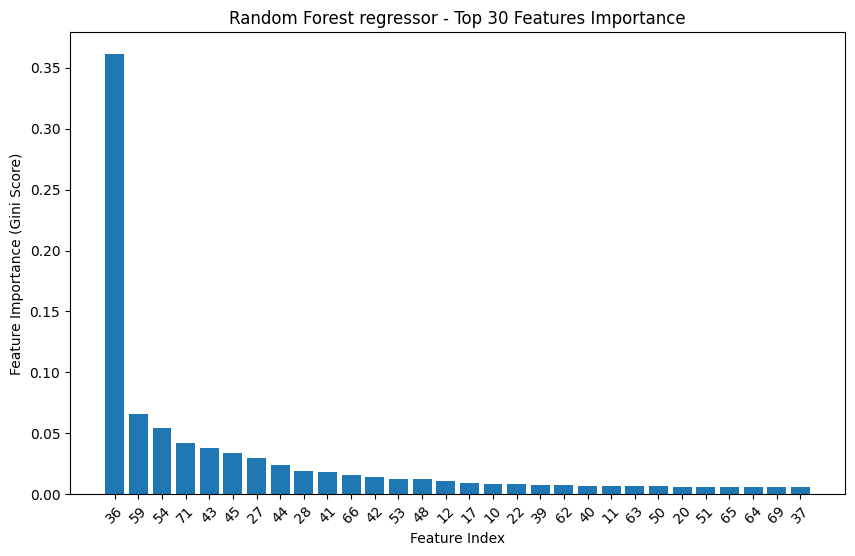

Features with Gini score higher than 0.025: [36 59 54 71 43 45 27]
Total number of features: 7


In [ ]:
#Finding the most important features
important_features_forest = model_forest.feature_importances_

#Plotting the top 30 most important features from Random Forest regressor
indices = np.argsort(important_features_forest)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(30), important_features_forest[indices[:30]])
plt.xticks(range(30), indices[:30], rotation=45)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance (Gini Score)")
plt.title(f"Random Forest regressor - Top 30 Features Importance")
plt.show()

#Selecting and printing the most important features
selected_indices = np.where(important_features_forest > 0.025)[0]
sorted_indices = np.argsort(important_features_forest[selected_indices])[::-1]
final_selected_indices = selected_indices[sorted_indices]
print("Features with Gini score higher than 0.025:", final_selected_indices)
print("Total number of important features:", len(final_selected_indices))

From the plot, we consider that the top 7 features contribute the most importantly to the model because they have a Gini score higher than 0.025. Therefore, we will fit the model with ony those top 7 features in order to reduce overfitting, and afterwards see how accurate the model is.

In [ ]:
#Retrieving the top 20 most important features and adding them into a new X_train and X_test variable
important_features = np.argsort(important_features_forest)[::-1][:7]
important_features = important_features.astype(int)
X_train_fi_forest = X_train_scaled_forest[:, important_features]
X_test_fi_forest = X_test_scaled_forest[:, important_features]

In [ ]:
#Optimizing the new model hyperparameters using randomized search (for reducing time complexity)
param_grid_forest = {'max_depth': [None, 5, 10], "max_features": [None, 5, 10], 'n_estimators': [50, 100, 150], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_forest = RandomizedSearchCV(RandomForestRegressor(), param_grid_forest, cv=5, n_jobs=-1, return_train_score=True)
grid_forest.fit(X_train_fi_forest, y_train)

print(grid_forest.best_score_)
print(grid_forest.best_params_)

0.6530903536965705
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}


In [ ]:
#Fitting the new Random Forest regression model to the training data
model_fi_forest = RandomForestRegressor(**{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None})
model_fi_forest.fit(X_train_fi_forest, y_train)

#Calculating the new Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_fi_forest = model_fi_forest.predict(X_test_fi_forest)

test_mse_forest = mean_squared_error(y_test, y_pred_test_fi_forest)
test_mae_forest = mean_absolute_error(y_test, y_pred_test_fi_forest)
test_r2_forest = r2_score(y_test, y_pred_test_fi_forest)
print(f"Test MSE: {test_mse_forest:.4f}")
print(f"Test MAE: {test_mae_forest:.4f}")
print(f"Test R^2: {test_r2_forest:.4f}")

y_pred_train_fi_forest = model_fi_forest.predict(X_train_fi_forest)

train_mse_forest = mean_squared_error(y_train, y_pred_train_fi_forest)
train_mae_forest = mean_absolute_error(y_train, y_pred_train_fi_forest)
train_r2_forest = r2_score(y_train, y_pred_train_fi_forest)
print(f"\nTrain MSE: {train_mse_forest:.4f}")
print(f"Train MAE: {train_mae_forest:.4f}")
print(f"Train R^2: {train_r2_forest:.4f}")

Test MSE: 3.9030
Test MAE: 1.4570
Test R^2: 0.6443

Train MSE: 1.6380
Train MAE: 0.8919
Train R^2: 0.8537


The train and test R^2 scores now are lower with feature scaling, so it did not help in trying to improve the model performance (we also tried with other thresholds for selecting important features but the evaluation metrics did not improve). Also the gap is the same so it is still overfitting. We will use the scores from before feature selection to plot the predictions.

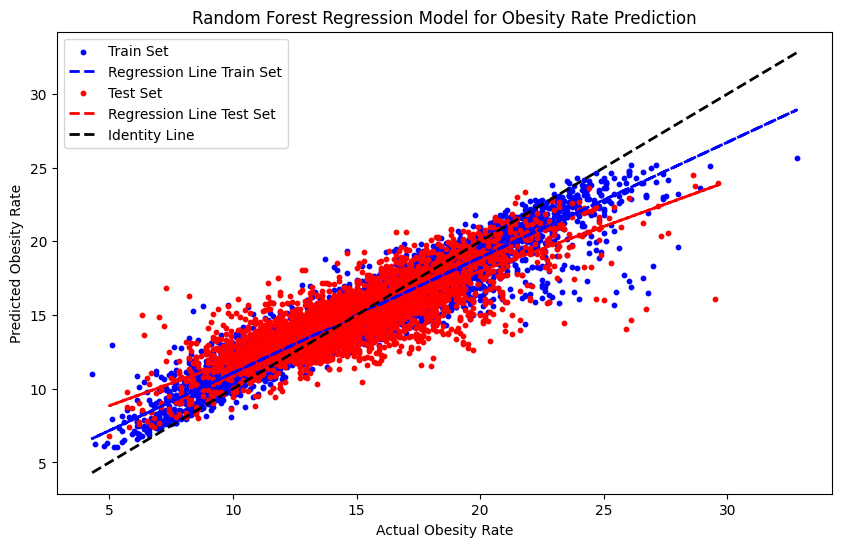

In [ ]:
#Plotting the actual vs predicted obesity rates
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train_forest, color="blue", label="Train Set", s=10)
regression_line_train = np.polyfit(y_train, y_pred_train_forest, 1)
plt.plot(y_train, np.polyval(regression_line_train, y_train), color="blue", linestyle="--", linewidth=2, label="Regression Line Train Set")

plt.scatter(y_test, y_pred_test_forest, color="red", label="Test Set", s=10)
regression_line_test = np.polyfit(y_test, y_pred_test_forest, 1)
plt.plot(y_test, np.polyval(regression_line_test, y_test), color="red", linestyle="--", linewidth=2, label="Regression Line Test Set")

plt.plot([min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         linestyle="--", color="black", linewidth=2, label="Identity Line")

plt.title("Random Forest Regression Model for Obesity Rate Prediction")
plt.xlabel("Actual Obesity Rate")
plt.ylabel("Predicted Obesity Rate")
plt.legend()
plt.show()

From the plot we can see how the model manages to explain almost 89% of the variance in the training data, while only explains 67% of the testing data. For the moment this is the best model we have encountered and, even though it can serve as a fairly good model, a test R^2 score of 67% should still be improved.

We will continue by trying K-Nearest Neighbors regressor.

### K-Nearest Neighbors (KNN) regression model

In [ ]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train)
X_test_scaled_knn = scaler.transform(X_test)

#Fitting the K-Nearest Neighbors regression model to the training data
model_knn = KNeighborsRegressor(n_neighbors=9, p=1, weights="distance")
model_knn.fit(X_train_scaled_knn, y_train)

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

In [ ]:
#Calculating the Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_knn = model_knn.predict(X_test_scaled_knn)

test_mse_knn = mean_squared_error(y_test, y_pred_test_knn)
test_mae_knn = mean_absolute_error(y_test, y_pred_test_knn)
test_r2_knn = r2_score(y_test, y_pred_test_knn)
print(f"Test MSE: {test_mse_knn:.4f}")
print(f"Test MAE: {test_mae_knn:.4f}")
print(f"Test R^2: {test_r2_knn:.4f}")

y_pred_train_knn = model_knn.predict(X_train_scaled_knn)

train_mse_knn = mean_squared_error(y_train, y_pred_train_knn)
train_mae_knn = mean_absolute_error(y_train, y_pred_train_knn)
train_r2_knn = r2_score(y_train, y_pred_train_knn)
print(f"\nTrain MSE: {train_mse_knn:.4f}")
print(f"Train MAE: {train_mae_knn:.4f}")
print(f"Train R^2: {train_r2_knn:.4f}")

Test MSE: 4.5743
Test MAE: 1.5612
Test R^2: 0.5831

Train MSE: 0.0007
Train MAE: 0.0005
Train R^2: 0.9999


In [ ]:
#Optimizing the model hyperparameters using grid search
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train_scaled_knn, y_train)

print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.5832775460537887
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


A train R^2 score of 0.99 and test R^2 score of 0.58 shows that the model is clearly overfitting. Also, a test MSE of 4.57 shows that the model is not able to do accurate predictions. Lets apply feature scaling to see if it gets better.

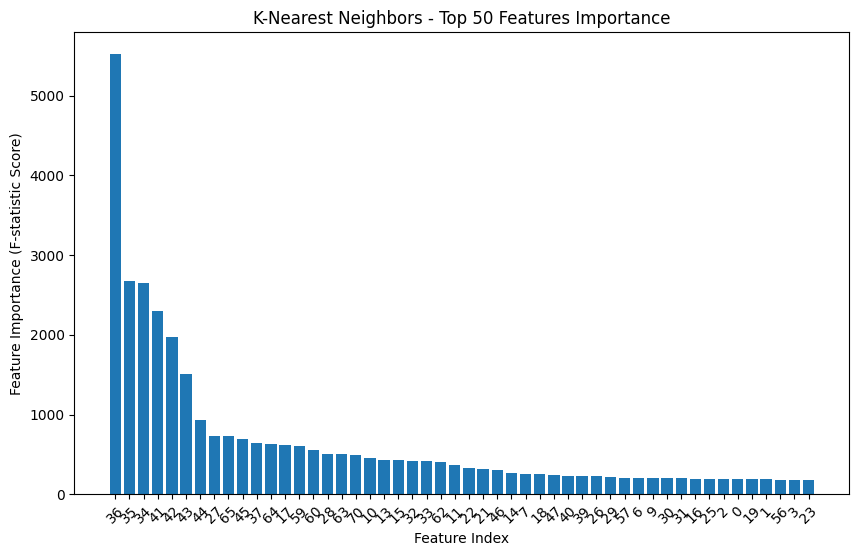

Features with F-Statistic score higher than 250: [36 35 34 41 42 43 44 27 65 45 37 64 17 59 60 28 63 70 10 13 15 32 33 62
 11 22 21 46 14  7 18]
Total number of important features: 31


In [ ]:
#Finding the most important features
selector = SelectKBest(score_func=f_regression, k=31)
X_train_fi_knn = selector.fit_transform(X_train_scaled_knn, y_train)
X_test_fi_knn = selector.transform(X_test_scaled_knn)

#Plotting the top 50 most important features from KNN regressor
indices = np.argsort(-selector.scores_)[:50]
plt.figure(figsize=(10, 6))
plt.bar(range(50), selector.scores_[indices])
plt.xticks(range(50), indices, rotation=45)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance (F-statistic Score)")
plt.title("K-Nearest Neighbors - Top 50 Features Importance")
plt.show()

#Selecting and printing the most important features
selected_indices_knn = np.where(selector.scores_ > 250)[0]
sorted_indices_knn = np.argsort(selector.scores_[selected_indices_knn])[::-1]
final_selected_indices_knn = selected_indices_knn[sorted_indices_knn]
print("Features with F-Statistic score higher than 250:", final_selected_indices_knn)
print("Total number of important features:", len(final_selected_indices_knn))

From the plot, we consider that the top 31 features contribute the most importantly to the model because they have a F-Statistic score higher than 250. Therefore, we will fit the model by selecting k=31 in order to reduce overfitting, and afterwards see how accurate the model is.

In [ ]:
#Optimizing the new model hyperparameters using grid search
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train_fi_knn, y_train)

print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.5171563065846273
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [ ]:
#Fitting the new K-Nearest Neighbors regression model to the training data
model_fi_knn = KNeighborsRegressor(n_neighbors=9, p=1, weights="distance")
model_fi_knn.fit(X_train_fi_knn, y_train)

#Calculating the new Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_fi_knn = model_fi_knn.predict(X_test_fi_knn)

test_mse_knn = mean_squared_error(y_test, y_pred_test_fi_knn)
test_mae_knn = mean_absolute_error(y_test, y_pred_test_fi_knn)
test_r2_knn = r2_score(y_test, y_pred_test_fi_knn)
print(f"Test MSE: {test_mse_knn:.4f}")
print(f"Test MAE: {test_mae_knn:.4f}")
print(f"Test R^2: {test_r2_knn:.4f}")

y_pred_train_fi_knn = model_fi_knn.predict(X_train_fi_knn)

train_mse_knn = mean_squared_error(y_train, y_pred_train_fi_knn)
train_mae_knn = mean_absolute_error(y_train, y_pred_train_fi_knn)
train_r2_knn = r2_score(y_train, y_pred_train_fi_knn)
print(f"\nTrain MSE: {train_mse_knn:.4f}")
print(f"Train MAE: {train_mae_knn:.4f}")
print(f"Train R^2: {train_r2_knn:.4f}")

Test MSE: 5.2109
Test MAE: 1.6643
Test R^2: 0.5250

Train MSE: 0.0409
Train MAE: 0.0093
Train R^2: 0.9963


With feature scaling the train R^2 was reduced a bit and the test R^2 score was reduced to 0.52, doing even a worse predictions, so we will keep the other scores as reference. This prooves that this model is not a good fit for the data as it tends to overfit (we also tried with other thresholds for SelectKBest but the evaluation metrics did not improve).

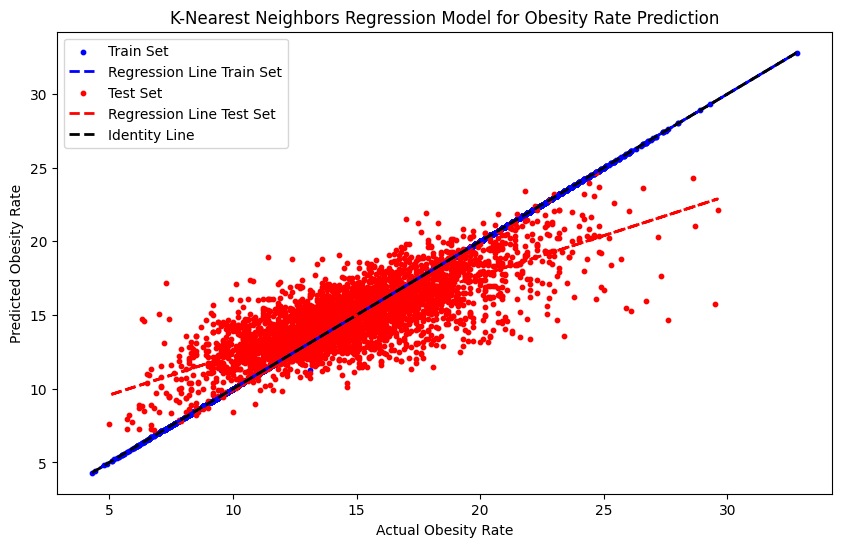

In [ ]:
#Plotting the actual vs predicted obesity rates
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train_knn, color="blue", label="Train Set", s=10)
regression_line_train = np.polyfit(y_train, y_pred_train_knn, 1)
plt.plot(y_train, np.polyval(regression_line_train, y_train), color="blue", linestyle="--", linewidth=2, label="Regression Line Train Set")

plt.scatter(y_test, y_pred_test_knn, color="red", label="Test Set", s=10)
regression_line_test = np.polyfit(y_test, y_pred_test_knn, 1)
plt.plot(y_test, np.polyval(regression_line_test, y_test), color="red", linestyle="--", linewidth=2, label="Regression Line Test Set")

plt.plot([min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         linestyle="--", color="black", linewidth=2, label="Identity Line")

plt.title("K-Nearest Neighbors Regression Model for Obesity Rate Prediction")
plt.xlabel("Actual Obesity Rate")
plt.ylabel("Predicted Obesity Rate")
plt.legend()
plt.show()

From the plot we can see how the model manages to explain almost a 100% of the variance in the training data, while only explains 58% of the testing data. This is clearly not a good model due to its complexity, as it is overfitting.

We are looking for a model that strikes a balance between simplicity and complexity. Lets continue by trying to fit the model to a Support Vector regressor.

### Support Vector Regressor (SVR) regression model

In [ ]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled_svr = scaler.fit_transform(X_train)
X_test_scaled_svr = scaler.transform(X_test)

#Fitting the Support Vector regression model to the training data
model_svr = SVR(kernel='rbf', C=100)
model_svr.fit(X_train_scaled_svr, y_train)

SVR(C=100)

In [ ]:
#Calculating the Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_svr = model_svr.predict(X_test_scaled_svr)

test_mse_svr = mean_squared_error(y_test, y_pred_test_svr)
test_mae_svr = mean_absolute_error(y_test, y_pred_test_svr)
test_r2_svr = r2_score(y_test, y_pred_test_svr)
print(f"Test MSE: {test_mse_svr:.4f}")
print(f"Test MAE: {test_mae_svr:.4f}")
print(f"Test R^2: {test_r2_svr:.4f}")

y_pred_train_svr = model_svr.predict(X_train_scaled_svr)

train_mse_svr = mean_squared_error(y_train, y_pred_train_svr)
train_mae_svr = mean_absolute_error(y_train, y_pred_train_svr)
train_r2_svr = r2_score(y_train, y_pred_train_svr)
print(f"\nTrain MSE: {train_mse_svr:.4f}")
print(f"Train MAE: {train_mae_svr:.4f}")
print(f"Train R^2: {train_r2_svr:.4f}")

Test MSE: 3.1308
Test MAE: 1.2471
Test R^2: 0.7146

Train MSE: 1.9190
Train MAE: 0.7795
Train R^2: 0.8286


In [ ]:
#Optimizing the model hyperparameters using randomized search (for reducing time complexity)
param_grid_svr = {'C': [0.1, 1, 10, 100], 'kernel': ['poly', 'rbf', 'sigmoid']}
grid_svr = RandomizedSearchCV(SVR(), param_grid_svr, cv=5, n_jobs=-1, return_train_score=True)
grid_svr.fit(X_train_scaled_svr, y_train)

print(grid_svr.best_score_)
print(grid_svr.best_params_)

0.6941863842135456
{'kernel': 'rbf', 'C': 100}


A train R^2 score of 0.82 and test R^2 score of 0.71 shows that this is a reasonably accurate model. Also, a test MSE of 3.13 is a reasonably low error, so this model could serve as a good predictor. Lets try feature selection to see if we can improve it.

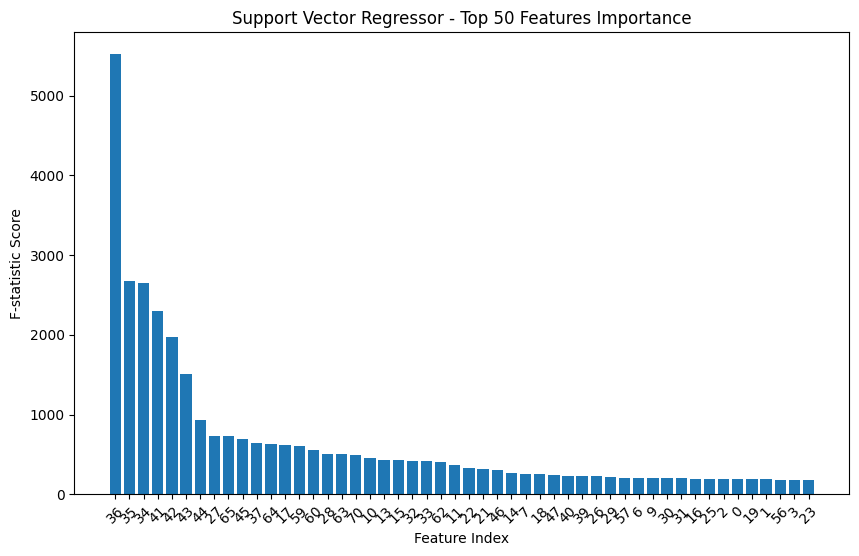

Features with F-Statistic score higher than 250: [36 35 34 41 42 43 44 27 65 45 37 64 17 59 60 28 63 70 10 13 15 32 33 62
 11 22 21 46 14  7 18]
Total number of important features: 31


In [ ]:
#Finding the most important features
selector = SelectKBest(score_func=f_regression, k=31)
X_train_fi_svr = selector.fit_transform(X_train_scaled_svr, y_train)
X_test_fi_svr = selector.transform(X_test_scaled_svr)

#Plotting the top 50 most important features from KNN regressor
indices = np.argsort(-selector.scores_)[:50]
plt.figure(figsize=(10, 6))
plt.bar(range(50), selector.scores_[indices])
plt.xticks(range(50), indices, rotation=45)
plt.xlabel("Feature Index")
plt.ylabel("F-statistic Score")
plt.title("Support Vector Regressor - Top 50 Features Importance")
plt.show()

#Selecting and printing the most important features
selected_indices_svr = np.where(selector.scores_ > 250)[0]
sorted_indices_svr = np.argsort(selector.scores_[selected_indices_svr])[::-1]
final_selected_indices_svr = selected_indices_svr[sorted_indices_svr]
print("Features with F-Statistic score higher than 250:", final_selected_indices_svr)
print("Total number of important features:", len(final_selected_indices_svr))

From the plot, we consider that the top 31 features contribute the most importantly to the model because they have a F-Statistic score higher than 250. Therefore, we will fit the model by selecting k=31 in order to reduce overfitting, and afterwards see how accurate the model is.

In [ ]:
#Optimizing the new model hyperparameters using randomized search (for reducing time complexity)
param_grid_svr = {'C': [0.1, 1, 10, 100], 'kernel': ['poly', 'rbf', 'sigmoid']}
grid_svr = RandomizedSearchCV(SVR(), param_grid_svr, cv=5, n_jobs=-1, return_train_score=True)
grid_svr.fit(X_train_fi_svr, y_train)

print(grid_svr.best_score_)
print(grid_svr.best_params_)

0.6128776277287973
{'kernel': 'rbf', 'C': 10}


In [ ]:
#Fitting the new Support Vector Regressor regression model to the training data
model_fi_svr = SVR(kernel="rbf", C=10)
model_fi_svr.fit(X_train_fi_svr, y_train)

#Calculating the new Mean Squared Error, Mean Absolute Error and Coefficient of Determination
y_pred_test_fi_svr = model_fi_svr.predict(X_test_fi_svr)

test_mse_svr = mean_squared_error(y_test, y_pred_test_fi_svr)
test_mae_svr = mean_absolute_error(y_test, y_pred_test_fi_svr)
test_r2_svr = r2_score(y_test, y_pred_test_fi_svr)
print(f"Test MSE: {test_mse_svr:.4f}")
print(f"Test MAE: {test_mae_svr:.4f}")
print(f"Test R^2: {test_r2_svr:.4f}")

y_pred_train_fi_svr = model_fi_svr.predict(X_train_fi_svr)

train_mse_svr = mean_squared_error(y_train, y_pred_train_fi_svr)
train_mae_svr = mean_absolute_error(y_train, y_pred_train_fi_svr)
train_r2_svr = r2_score(y_train, y_pred_train_fi_svr)
print(f"\nTrain MSE: {train_mse_svr:.4f}")
print(f"Train MAE: {train_mae_svr:.4f}")
print(f"Train R^2: {train_r2_svr:.4f}")

Test MSE: 4.1566
Test MAE: 1.4674
Test R^2: 0.6211

Train MSE: 3.4314
Train MAE: 1.2444
Train R^2: 0.6936


Now it displays a lower test and train R^2 scores. This means that feature selection was not useful, so we will keep the other scores as reference in order to plot the predictions (we also tried with other thresholds for SelectKBest but the evaluation metrics did not improve).

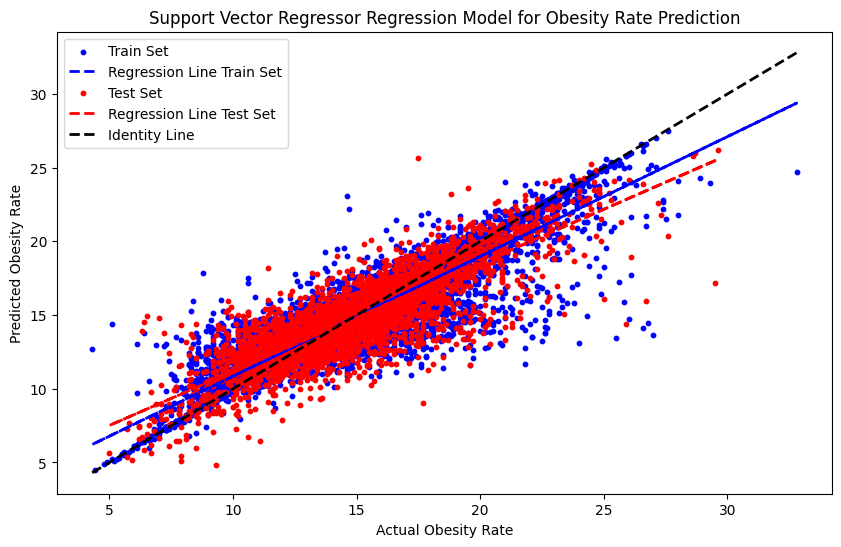

In [ ]:
#Plotting the actual vs predicted obesity rates
plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train_svr, color="blue", label="Train Set", s=10)
regression_line_train = np.polyfit(y_train, y_pred_train_svr, 1)
plt.plot(y_train, np.polyval(regression_line_train, y_train), color="blue", linestyle="--", linewidth=2, label="Regression Line Train Set")

plt.scatter(y_test, y_pred_test_svr, color="red", label="Test Set", s=10)
regression_line_test = np.polyfit(y_test, y_pred_test_svr, 1)
plt.plot(y_test, np.polyval(regression_line_test, y_test), color="red", linestyle="--", linewidth=2, label="Regression Line Test Set")

plt.plot([min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         [min(min(y_train), min(y_test)), max(max(y_train), max(y_test))],
         linestyle="--", color="black", linewidth=2, label="Identity Line")

plt.title("Support Vector Regressor Regression Model for Obesity Rate Prediction")
plt.xlabel("Actual Obesity Rate")
plt.ylabel("Predicted Obesity Rate")
plt.legend()
plt.show()

Ultimately, the Support Vector Regressor ends up as the regression model that achieves the most optimal fit for the data. The model manages to explain almost a 83% of the variance in the training data and almost 72% of variance in the testing data. This means that this model is able to generalize well to new, unseen data. Therefore, SVR would serve as a pretty good model to predict obesity rates.

## PART 3 - Evaluating the top-performing regression model: Support Vector Regressor

### Analysing the predictions

First we will create a new data frame with the initial index *regio* and its respective actual and predicted obesity rates, in order to see how our model manages to capture the data and predict these rates within regions of The Netherlands.

In [ ]:
# Converting y_train and y_test back to DataFrames
y_train_df = pd.DataFrame(y_train, columns=["obesity_rate"])
y_test_df = pd.DataFrame(y_test, columns=["obesity_rate"])

#Concatenating the dataframe along the rows
y_combined = pd.concat([y_train_df, y_test_df], axis=0)

In [ ]:
#Converting NumPy arrays to Pandas Series (to facilitate concatenating afterwards)
y_train_svr_series = pd.Series(y_train)
y_test_svr_series = pd.Series(y_test)
y_pred_train_svr_series = pd.Series(y_pred_train_svr)
y_pred_test_svr_series = pd.Series(y_pred_test_svr)

In [ ]:
#Concatenating actual and predicted values
actual_obesity_rate = pd.concat([y_train_svr_series, y_test_svr_series], axis=0, ignore_index=True)
predicted_obesity_rate = pd.concat([y_pred_train_svr_series, y_pred_test_svr_series], axis=0, ignore_index=True)

#Creating a DataFrame with regions, actual values and predicted values
df_obesity_rate = pd.DataFrame({"Actual obesity rate": actual_obesity_rate, "Predicted obesity rate": predicted_obesity_rate})
df_obesity_rate["Region"] = y_combined.index
df_obesity_rate = df_obesity_rate[["Region", "Actual obesity rate", "Predicted obesity rate"]]

In [ ]:
df_obesity_rate[:10]

,Region,Actual obesity rate,Predicted obesity rate
0,Oostpoort,10.0,10.100051
1,Wijk 00 Borculo,16.5,16.525362
2,Verspreide bebouwing Zuidplaspolder Zevenhuizen,11.5,11.399911
3,Deursen en Dennenburg,12.2,13.736753
4,Eemspoort,14.1,14.000156
5,Kolham,18.9,17.223710
6,Tolhoeck,21.6,20.267781
7,Ambachtenbuurt-Oost,17.7,17.599899
8,Westhoek,16.7,15.202662
9,Wijk 05 't Ruige Veld,13.9,14.036525


In this table we can see how for each municipality code the model predicted values for the obesity rate, and how these values differ from the actual value of obesity rate. It is possible to see the resemblance but, to visualizate it even better, lets plot the comparisson of how an ideal model would predict obesity rates against how our model does.

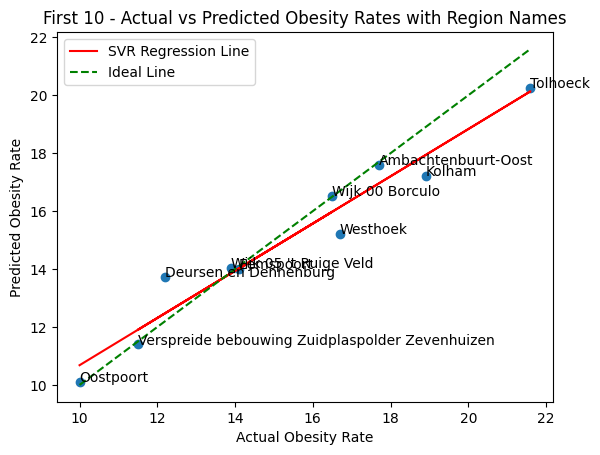

In [ ]:
#Creating a plot to display the difference in performance between an ideal model and our model
plt.scatter(df_obesity_rate["Actual obesity rate"][:10], df_obesity_rate["Predicted obesity rate"][:10])
plt.xlabel("Actual Obesity Rate")
plt.ylabel("Predicted Obesity Rate")
plt.title("First 10 - Actual vs Predicted Obesity Rates with Region Names")

for i, code in enumerate(df_obesity_rate["Region"][:10]):
    plt.annotate(code, (df_obesity_rate["Actual obesity rate"][i], df_obesity_rate["Predicted obesity rate"][i]))

regression_line = np.polyfit(df_obesity_rate["Actual obesity rate"][:10], df_obesity_rate["Predicted obesity rate"][:10], 1)
plt.plot(df_obesity_rate["Actual obesity rate"][:10], np.polyval(regression_line, df_obesity_rate["Actual obesity rate"][:10]), color="red", label="SVR Regression Line")
ideal_line = np.linspace(min(df_obesity_rate["Actual obesity rate"][:10]), max(df_obesity_rate["Actual obesity rate"][:10]), 100)
plt.plot(ideal_line, ideal_line, color="green", linestyle="--", label="Ideal Line")
plt.legend()
plt.show()

The plot shows, for an example of the first 10 values in our data frame, how an ideal model would fit the data vs how our model fits the data. Same as with a table, it is possible to see the resemblance between models from a more visual perspective. The model manages to predict quite accurately obesity rates within the different regions of The Netherlands.

### Examining the correlations between features and obesity rate

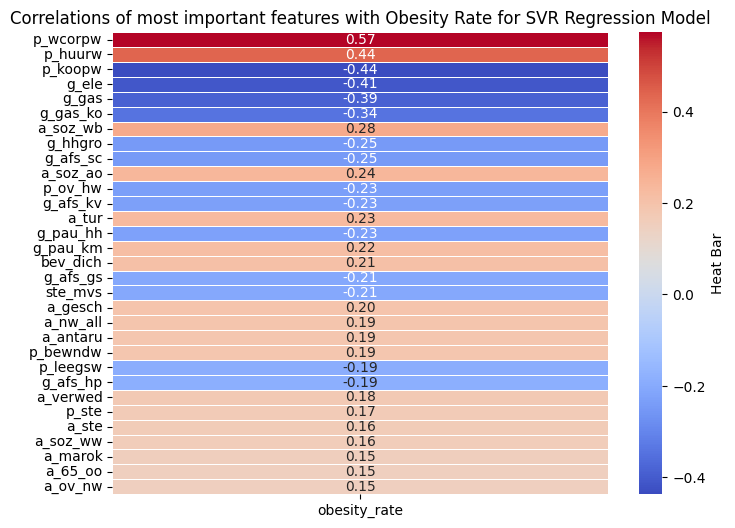

In [ ]:
#Selecting the top important features from SVR and creating a correlation matrix
selected_features_svr = np.column_stack((X_train_scaled_svr[:, final_selected_indices_svr], y_train))
selected_feature_names_svr = [list(df.columns)[i] for i in final_selected_indices_svr] + ["obesity_rate"]
correlation_matrix_svr = np.corrcoef(selected_features_svr, rowvar=False)
target_correlations_df = pd.DataFrame(correlation_matrix_svr[:-1, -1], index=selected_feature_names_svr[:-1], columns=["obesity_rate"])

#Plotting the correlations between obesity rates and the other features
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(target_correlations_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True,
                      cbar_kws={"label": "Heat Bar"})
plt.title("Correlations of most important features with Obesity Rate for SVR Regression Model")
plt.show()

From this correlation heatmap we can see that certain features have a higher correlation with obesity rates than others. For instance *p_wcorpw*, which refers to the amount of "residences owned by a housing association", has a correlation of 0.57 with obesity rate. Moreover, features like *g_ele* or *g_gas*, which refer to the "average electricity consumption total" and "average total natural gas consumption", also are more correlated to obesity rates than the other features. This means that the fact that regions have, for instance, more residences owned by housing associations, contributes more to having higher obesity rates in that regions than other attributes. However, as correlation does not imply causation, it would be relevant to assess through additional analysis whether this is indeed significant or not.